## Zuber Platform

You are working as an analyst for Zuber, a new ride-sharing company launching in Chicago. Your task is to identify patterns within the available data. You aim to understand passenger preferences and the impact of external factors on ride behavior. <br>
<br>
While working with a database, you will analyze data from competitors and test a hypothesis about the effect of weather conditions on trip frequency.

## Data Dictionary

A database containing information about taxi trips in Chicago: <br>

DataSet Companies (project_sql_results_01):
-	company_name: data on the names of taxi companies
-	trips_amount: the number of trips completed by each taxi company on November 15 and 16, 2017

DataSet Trips (project_sql_results_04):
-	dropoff_location_name: Chicago neighborhoods where trips ended
-	average_trips: data on the average number of trips that ended in each neighborhood in November 2017

DataSet loop_ohare (project_sql_results_07):
-	start_ts: pickup date and time
-	weather_conditions: weather conditions at the time the trip began
-	duration_seconds: duration of the trip in seconds


# 1. Initialization

In [1]:
# Load libraries
import pandas as pd
import numpy as np
from scipy import stats
from math import factorial
import seaborn as sns
from matplotlib import pyplot as plt

### 1.1 Load Data

In [ ]:
# Load each dataset into its corresponding DataFrame
df_companies = pd.read_csv('project_sql_result_01.csv')
df_trips = pd.read_csv('project_sql_result_04.csv')
df_loop_ohare = pd.read_csv('project_sql_result_07.csv')

# 2. Data Preparation

### 2.1 Data / Column Review

In [3]:
# Reviewing the data in each DataFrame
# First, the df_companies DataFrame:
df_companies.info()
print()
print(df_companies.isnull().sum())
print()
print(df_companies.sample(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB

company_name    0
trips_amount    0
dtype: int64

                        company_name  trips_amount
31  American United Taxi Affiliation           210
39       0118 - 42111 Godfrey S.Awir            33
50      2823 - 73307 Lee Express Inc            15
15          Checker Taxi Affiliation          2216
46   3620 - 52292 David K. Cab Corp.            21
26                   Gold Coast Taxi           428
6                       City Service          8448
59      4053 - 40193 Adwar H. Nikola             7
0                          Flash Cab         19558
47     4615 - 83503 Tyrone Henderson            21


In [4]:
# Now, the df_trips DataFrame
df_trips.info()
print()
print(df_trips.isnull().sum())
print()
print(df_trips.sample(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB

dropoff_location_name    0
average_trips            0
dtype: int64

    dropoff_location_name  average_trips
54         North Lawndale      32.166667
90              Hegewisch       3.117647
85              Montclare       5.766667
78              Gage Park       8.233333
88                  Undef       3.800000
30          United Center     178.900000
49  Sauganash,Forest Glen      43.566667
4                  O'Hare    2546.900000
26              Hyde Park     255.133333
48                 Austin      44.433333


In [5]:
# Now, the df_loop_ohare DataFrame
df_loop_ohare.info()
print()
print(df_loop_ohare.isnull().sum())
print()

# Data integrity
df_loop_ohare['duration_seconds'] = df_loop_ohare['duration_seconds'].astype(int)
df_loop_ohare['start_ts'] = pd.to_datetime(df_loop_ohare['start_ts'])

# Sample outputs
print(df_loop_ohare.sample(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB

start_ts              0
weather_conditions    0
duration_seconds      0
dtype: int64

                start_ts weather_conditions  duration_seconds
167  2017-11-18 12:00:00                Bad              2220
1005 2017-11-04 14:00:00               Good              2704
1018 2017-11-11 18:00:00               Good              2160
583  2017-11-11 16:00:00               Good              4980
240  2017-11-11 10:00:00               Good              1243
210  2017-11-11 20:00:00               Good              1500
355  2017-11-11 16:00:00               Good              2400
292  2017-11-

For the df_companies and df_trips DataFrames, no data inconsistencies were found, so we can proceed with the analysis. <br>
In the case of the df_loop_ohare DataFrame, the data type was changed from float to int to optimize subsequent analysis, and all values in the start_ts column were ensured to be in datetime format.

# 3. Data Analysis

### 3.1 Top Neighborhoods by Trip Dropoff

In [6]:
# Identify the top 10 neighborhoods by trip dropoff
top_neighborhoods = df_trips.groupby(by='dropoff_location_name')['average_trips'].sum()
top_neighborhoods = top_neighborhoods.sort_values(ascending=False)
print(top_neighborhoods.head(10))

dropoff_location_name
Loop                  10727.466667
River North            9523.666667
Streeterville          6664.666667
West Loop              5163.666667
O'Hare                 2546.900000
Lake View              2420.966667
Grant Park             2068.533333
Museum Campus          1510.000000
Gold Coast             1364.233333
Sheffield & DePaul     1259.766667
Name: average_trips, dtype: float64


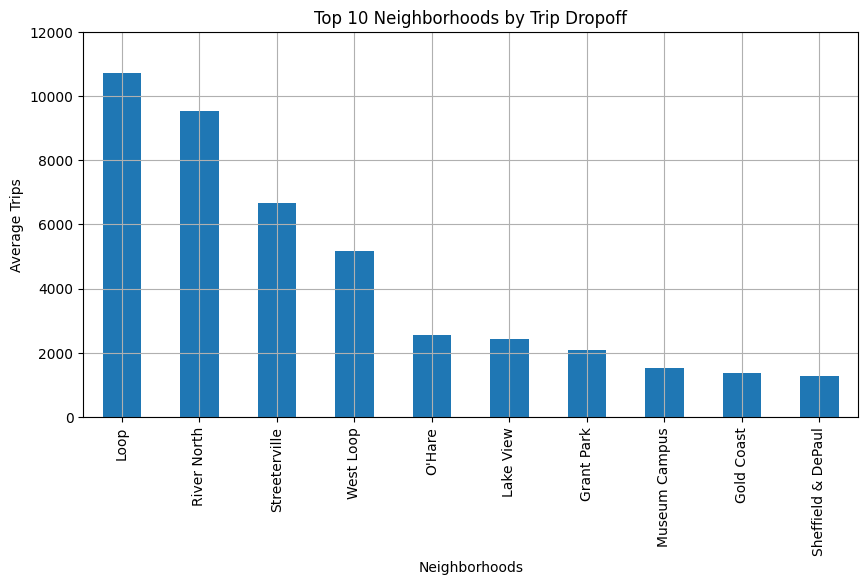

In [7]:
# Plot the results
ax = top_neighborhoods.head(10).plot(
    title='Top 10 Neighborhoods by Trip Dropoff',
    kind="bar",
    figsize=(10,5),
    grid=True,
    ylim=(0,12000),
    xlabel="Neighborhoods",
    ylabel="Average Trips"
)
plt.show()

### 3.2 Top cab companies by Trip numbers

In [8]:
# Taxi companies and trip counts
# Identify taxi companies by their number of trips.
top_companies_trips = df_companies.groupby(by='company_name')['trips_amount'].sum()
top_companies_trips = top_companies_trips.sort_values(ascending=False)
print(top_companies_trips.head(10))

company_name
Flash Cab                            19558
Taxi Affiliation Services            11422
Medallion Leasin                     10367
Yellow Cab                            9888
Taxi Affiliation Service Yellow       9299
Chicago Carriage Cab Corp             9181
City Service                          8448
Sun Taxi                              7701
Star North Management LLC             7455
Blue Ribbon Taxi Association Inc.     5953
Name: trips_amount, dtype: int64


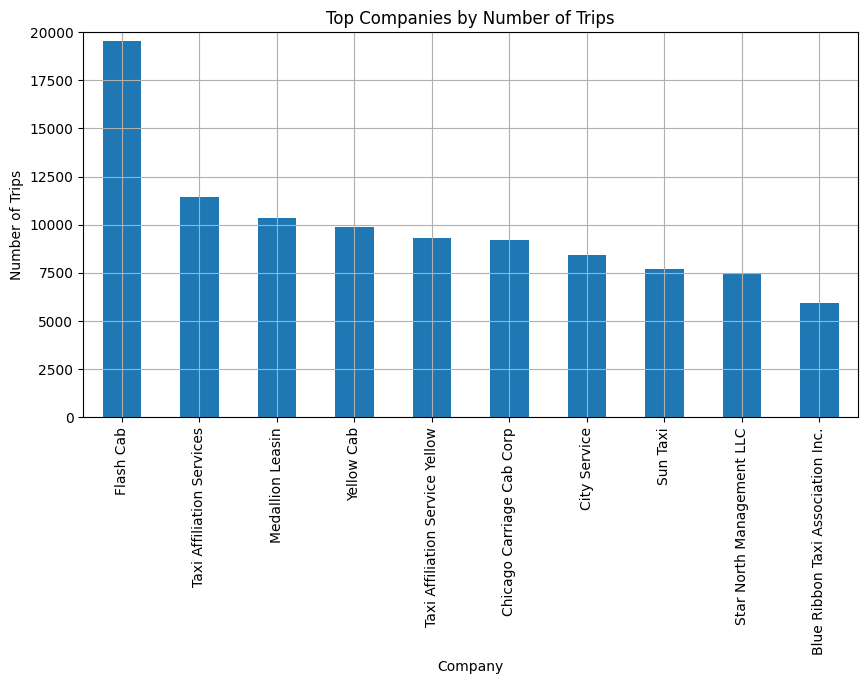

In [9]:
# Plot the observations
ax = top_companies_trips.head(10).plot(
    title='Top Companies by Number of Trips',
    kind="bar",
    figsize=(10,5),
    grid=True,
    ylim=(0,20000),
    xlabel="Company",
    ylabel="Number of Trips"
)
plt.show()

Based on the analysis of the graphs, the following observations can be made: <br>
The main destinations where trips tend to end are:
-	Loop
-	River North
-	Streeterville
-	West Loop

These appear to be the preferred dropoff locations for users. These four neighborhoods exceed 5,000 average trips, while the remaining six fall between 1,250 and 2,500. The Loop stands out as the top destination, with an average of nearly 11,000 trips. <br>
<br>
Regarding the top taxi companies by number of trips, Flash Cab is clearly the most preferred company, showing a strong lead over all competitors. It records 19,558 trips, compared to Taxi Affiliation Services, which ranks second with 11,422 trips.


# 4. Hypothesis Testing

Hypotheses <br>

- H₀ (Null Hypothesis): There is no difference in the average trip duration from the Loop to O'Hare International Airport on rainy Saturdays versus non-rainy Saturdays.

- H₁ (Alternative Hypothesis): There is a difference in the average trip duration from the Loop to O'Hare International Airport on rainy Saturdays versus non-rainy Saturdays.

In [10]:
# Significance Level
alpha = 0.05

# Filter trips occurring on Saturdays
df_saturday = df_loop_ohare[df_loop_ohare['start_ts'].dt.weekday == 5]
print(df_saturday)

# Separate rainy and non-rainy Saturdays
saturday_rain = df_saturday[df_saturday['weather_conditions'] == 'Bad']['duration_seconds']
saturday_no_rain = df_saturday[df_saturday['weather_conditions'] == 'Good']['duration_seconds']

# Resolucion de Hipotesis
# Check equality of variances thru Levene's test
statistics, p_value = stats.levene(saturday_rain, saturday_no_rain)
print(f'Valor para la prueba de Levene es: {p_value: .5f}')
if (p_value < alpha):
    print("Reject the null hypothesis: variances are different.")
else:
    print("Fail to reject the null hypothesis: variances are not different.")

# Since Levene’s test shows no significant difference in variances, we use a two-sample t-test:
t_stat, p_value = stats.ttest_ind(saturday_rain, saturday_no_rain, equal_var=False)
print(f'T-statistic: {t_stat: .10f}')
print(f'p-value: {p_value: .18f}')
print()

if p_value < alpha:
    print("Reject the null hypothesis: there is a difference in average trip duration.")
else:
    print("Fail to reject the null hypothesis: no evidence of a difference.")

                start_ts weather_conditions  duration_seconds
0    2017-11-25 16:00:00               Good              2410
1    2017-11-25 14:00:00               Good              1920
2    2017-11-25 12:00:00               Good              1543
3    2017-11-04 10:00:00               Good              2512
4    2017-11-11 07:00:00               Good              1440
...                  ...                ...               ...
1063 2017-11-25 11:00:00               Good                 0
1064 2017-11-11 10:00:00               Good              1318
1065 2017-11-11 13:00:00               Good              2100
1066 2017-11-11 08:00:00               Good              1380
1067 2017-11-04 16:00:00                Bad              2834

[1068 rows x 3 columns]
Valor para la prueba de Levene es:  0.53320
Fail to reject the null hypothesis: variances are not different.
T-statistic:  7.1860342881
p-value:  0.000000000006738994

Reject the null hypothesis: there is a difference in average tr

# 5. Conclusion

After performing a two-sample t-test to compare the average trip time from point A (Loop) to point B (O'Hare International Airport) on rainy versus non-rainy Saturdays, we obtained a p-value of 0.000000000006738994, which is far below the significance level α = 0.05. <br>
<br>
This means we reject the null hypothesis, as there is strong evidence of a difference in travel duration between rainy and non-rainy Saturdays. <br>
<br>
As a conclusion, the weather conditions—specifically rain—clearly have an impact on Saturday travel times. Trips from the Loop to O'Hare International Airport tend to be longer on rainy Saturdays.
